In [1]:
# ! git clone https://github.com/CodeArchitecture/FinRL.git

In [2]:
# import os
# os.chdir('/kaggle/working/FinRL')
# print(os.getcwd())

In [3]:
# ! pip install -r requirements.txt

In [1]:
from IPython.display import clear_output
clear_output(wait=True)

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor
from finrl.plot import backtest_stats, get_baseline
import itertools
from datetime import timedelta 
from datetime import datetime
from finrl.config_tickers import DOW_30_TICKER, SSE_50_TICKER, HSI_50_TICKER, DAX_30_TICKER
from finrl.main import clean_and_make_directories
from finrl.config import TRAINED_MODEL_DIR, RESULTS_DIR, INDICATORS

d:\Anaconda\envs\fin\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
clean_and_make_directories([TRAINED_MODEL_DIR, RESULTS_DIR, os.path.join(RESULTS_DIR,'a2c'),
                            os.path.join(RESULTS_DIR,'ddpg'),os.path.join(RESULTS_DIR,'ppo'),
                            os.path.join(RESULTS_DIR,'td3'),os.path.join(RESULTS_DIR,'sac')])

In [7]:
TRAIN_START_DATE = '2012-01-01'
TRAIN_END_DATE = '2022-01-01'
TRADE_START_DATE = '2022-01-01'
TRADE_END_DATE = '2023-01-01'

# TIMESTEPS = [100,100,100,100,100]
TIMESTEPS = [10000,10000,10000,10000,10000]

# '^DJI','000001.SS','^HSI', '^GDAXI'
# DOW_30_TICKER, SSE_50_TICKER, HSI_50_TICKER, DAX_30_TICKER
DATA_NAME = 'GDAXI'
PORTFOLIO = DAX_30_TICKER
BASELINES = '^GDAXI'

In [8]:
L=400
# download more date to compute tech indicator like macd
date = datetime.strptime(TRAIN_START_DATE, "%Y-%m-%d")
date = date - timedelta(days=L)
datetime.strftime(date, "%Y-%m-%d")
df = YahooDownloader(start_date = date,
                     end_date = TRADE_END_DATE,
                     ticker_list = PORTFOLIO).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [9]:
print(PORTFOLIO)

['0011.HK', '0005.HK', '0012.HK', '0006.HK', '0003.HK', '0016.HK', '0019.HK', '0002.HK', '0001.HK', '0267.HK', '0101.HK', '0941.HK', '0762.HK', '0066.HK', '0883.HK', '2388.HK', '0017.HK', '0083.HK', '0939.HK', '0388.HK', '0386.HK', '3988.HK', '2628.HK', '1398.HK', '2318.HK', '3328.HK', '0688.HK', '0857.HK', '1088.HK', '0700.HK', '0836.HK', '1109.HK', '1044.HK', '1299.HK', '0151.HK', '1928.HK', '0027.HK', '2319.HK', '0823.HK', '1113.HK', '1038.HK', '2018.HK', '0175.HK', '0288.HK', '1997.HK', '2007.HK', '2382.HK', '1093.HK', '1177.HK', '2313.HK']


In [10]:
df.shape

(145365, 8)

In [11]:
df.sort_values(['date','tic'],ignore_index=True).head()

,date,open,high,low,close,volume,tic,day
0,2010-11-29,81.835220,83.907906,80.977562,48.502251,3913688,0001.HK,0
1,2010-11-29,63.450001,64.250000,63.250000,38.007412,1894673,0002.HK,0
2,2010-11-29,7.247164,7.331791,7.239471,5.558336,11999169,0003.HK,0
3,2010-11-29,79.099998,80.099998,79.099998,45.809547,20219806,0005.HK,0
4,2010-11-29,49.799999,50.250000,49.799999,23.017241,3142842,0006.HK,0


In [12]:
df.tic.value_counts()

0001.HK    2982
1398.HK    2982
0939.HK    2982
0941.HK    2982
1038.HK    2982
1044.HK    2982
1088.HK    2982
1093.HK    2982
1109.HK    2982
1177.HK    2982
1299.HK    2982
2007.HK    2982
0836.HK    2982
2018.HK    2982
2313.HK    2982
2318.HK    2982
2319.HK    2982
2382.HK    2982
2388.HK    2982
2628.HK    2982
3328.HK    2982
3988.HK    2982
0857.HK    2982
0883.HK    2982
0823.HK    2982
0083.HK    2982
0003.HK    2982
0005.HK    2982
0006.HK    2982
0011.HK    2982
0012.HK    2982
0016.HK    2982
0017.HK    2982
0019.HK    2982
0027.HK    2982
0066.HK    2982
0101.HK    2982
0151.HK    2982
0175.HK    2982
0267.HK    2982
0386.HK    2982
0388.HK    2982
0688.HK    2982
0700.HK    2982
0762.HK    2982
1928.HK    2981
0002.HK    2981
0288.HK    2076
1113.HK    1873
1997.HK    1264
Name: tic, dtype: int64

In [13]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=True,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

Successfully added technical indicators
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (3043, 8)
Successfully added vix
Successfully added turbulence index


In [14]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [15]:
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2010-11-29,0001.HK,81.835220,83.907906,80.977562,48.502251,3913688.0,0.0,0.0,49.373178,46.678671,0.0,-66.666667,100.0,48.502251,48.502251,21.530001,0.0
1,2010-11-29,0003.HK,7.247164,7.331791,7.239471,5.558336,11999169.0,0.0,0.0,49.373178,46.678671,0.0,-66.666667,100.0,5.558336,5.558336,21.530001,0.0
2,2010-11-29,0005.HK,79.099998,80.099998,79.099998,45.809547,20219806.0,0.0,0.0,49.373178,46.678671,0.0,-66.666667,100.0,45.809547,45.809547,21.530001,0.0
3,2010-11-29,0006.HK,49.799999,50.250000,49.799999,23.017241,3142842.0,0.0,0.0,49.373178,46.678671,0.0,-66.666667,100.0,23.017241,23.017241,21.530001,0.0
4,2010-11-29,0011.HK,122.599998,127.099998,122.599998,76.239395,1755049.0,0.0,0.0,49.373178,46.678671,0.0,-66.666667,100.0,76.239395,76.239395,21.530001,0.0
5,2010-11-29,0012.HK,27.710539,28.198038,27.659222,18.018509,4089764.0,0.0,0.0,49.373178,46.678671,0.0,-66.666667,100.0,18.018509,18.018509,21.530001,0.0
6,2010-11-29,0016.HK,126.199997,128.899994,125.900002,76.398499,4450343.0,0.0,0.0,49.373178,46.678671,0.0,-66.666667,100.0,76.398499,76.398499,21.530001,0.0
7,2010-11-29,0017.HK,51.890854,52.232239,50.934967,27.515726,1035847.0,0.0,0.0,49.373178,46.678671,0.0,-66.666667,100.0,27.515726,27.515726,21.530001,0.0
8,2010-11-29,0019.HK,117.000000,117.599998,115.599998,72.654167,1429987.0,0.0,0.0,49.373178,46.678671,0.0,-66.666667,100.0,72.654167,72.654167,21.530001,0.0
9,2010-11-29,0027.HK,7.600000,7.890000,7.520000,7.067115,3734000.0,0.0,0.0,49.373178,46.678671,0.0,-66.666667,100.0,7.067115,7.067115,21.530001,0.0


In [16]:
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

108225
10710


In [17]:
train.head(2)

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2012-01-03,0001.HK,66.647461,67.183502,66.611725,40.322632,3164069.0,1.0,0.352617,40.507869,37.394069,52.176888,138.586448,26.477745,38.353397,39.128915,22.969999,48.756218
0,2012-01-03,0003.HK,7.684148,7.734925,7.599521,5.893865,9177182.0,1.0,0.014337,5.942331,5.722280,52.926925,130.775201,23.252702,5.836672,5.786574,22.969999,48.756218


In [18]:
train.tail(2)

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
2404,2021-12-31,3328.HK,4.77,4.77,4.70,4.348448,8677814.0,4.0,-0.004942,4.40397,4.224607,51.280054,39.397346,9.582904,4.333984,4.346448,17.219999,24.942284
2404,2021-12-31,3988.HK,2.82,2.84,2.81,2.576064,85346264.0,4.0,0.012390,2.58344,2.480681,56.857371,189.916323,41.427748,2.529921,2.526865,17.219999,24.942284


In [19]:
trade.head(2)

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2022-01-03,0001.HK,50.950001,51.700001,50.50,48.775604,3010477.0,0.0,-0.074998,48.851418,46.570021,49.250630,58.002980,15.376791,47.937325,48.977650,16.6,54.704631
0,2022-01-03,0003.HK,12.180000,12.400000,12.18,11.779861,8406856.0,0.0,0.106243,11.798268,11.065024,58.256709,218.954418,38.859017,11.389118,11.340835,16.6,54.704631


In [20]:
trade.tail(2)

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
237,2022-12-29,3328.HK,4.57,4.60,4.51,4.55,16261423.0,3.0,0.058727,4.5575,4.2595,56.548314,173.096049,43.295325,4.362000,4.216167,21.440001,45.329534
237,2022-12-29,3988.HK,2.84,2.85,2.81,2.84,229732726.0,3.0,0.036951,2.8367,2.6643,60.021892,184.971069,46.097774,2.727667,2.665667,21.440001,45.329534


In [21]:
INDICATORS

['macd',
 'boll_ub',
 'boll_lb',
 'rsi_30',
 'cci_30',
 'dx_30',
 'close_30_sma',
 'close_60_sma']

In [22]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 45, State Space: 451


In [23]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

In [24]:
env_train, _ = StockTradingEnv(df = train, **env_kwargs).get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [25]:
agent = DRLAgent(env = env_train)

if_using_a2c = True
if_using_ddpg = True
if_using_ppo = True
if_using_td3 = True
if_using_sac = True

### Agent Training: 5 algorithms (A2C, DDPG, PPO, TD3, SAC)


### Agent 1: A2C


In [26]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

trained_a2c = agent.train_model(model=model_a2c, 
                             total_timesteps=TIMESTEPS[0]) if if_using_a2c else None

{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cpu device
--------------------------------------
| time/                 |            |
|    fps                | 26         |
|    iterations         | 100        |
|    time_elapsed       | 18         |
|    total_timesteps    | 500        |
| train/                |            |
|    entropy_loss       | -63.9      |
|    explained_variance | -0.0101    |
|    learning_rate      | 0.0007     |
|    n_updates          | 99         |
|    policy_loss        | -123       |
|    reward             | 0.71276635 |
|    std                | 1          |
|    value_loss         | 14.1       |
--------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 26         |
|    iterations         | 200        |
|    time_elapsed       | 37         |
|    total_timesteps    | 1000       |
| train/                |            |
|    entropy_loss       | -6

KeyboardInterrupt: 

### Agent 2: DDPG

In [ ]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

trained_ddpg = agent.train_model(model=model_ddpg, 
                             total_timesteps=TIMESTEPS[1]) if if_using_ddpg else None

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device
day: 2467, episode: 10
begin_total_asset: 1000000.00
end_total_asset: 3026269.31
total_reward: 2026269.31
total_cost: 999.00
total_trades: 34538
Sharpe: 0.704
-----------------------------------
| time/              |            |
|    episodes        | 4          |
|    fps             | 8          |
|    time_elapsed    | 1123       |
|    total_timesteps | 9872       |
| train/             |            |
|    actor_loss      | 44.7       |
|    critic_loss     | 361        |
|    learning_rate   | 0.001      |
|    n_updates       | 7404       |
|    reward          | 0.22948067 |
-----------------------------------


### Agent 3: PPO

In [ ]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

trained_ppo = agent.train_model(model=model_ppo, 
                             total_timesteps=TIMESTEPS[2]) if if_using_ppo else None

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cpu device
-----------------------------------
| time/              |            |
|    fps             | 46         |
|    iterations      | 1          |
|    time_elapsed    | 44         |
|    total_timesteps | 2048       |
| train/             |            |
|    reward          | -2.7688584 |
-----------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 43          |
|    iterations           | 2           |
|    time_elapsed         | 93          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.012329413 |
|    clip_fraction        | 0.189       |
|    clip_range           | 0.2         |
|    entropy_loss         | -37         |
|    explained_variance   | -0.00154    |
|    learning_rate        | 0.00025     |
|    loss                 | 15.5

### Agent 4: TD3

In [ ]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100, 
              "buffer_size": 1000000, 
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

trained_td3 = agent.train_model(model=model_td3, 
                             total_timesteps=TIMESTEPS[3]) if if_using_td3 else None

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cpu device
day: 2467, episode: 20
begin_total_asset: 1000000.00
end_total_asset: 3214990.20
total_reward: 2214990.20
total_cost: 999.00
total_trades: 32071
Sharpe: 0.776
-----------------------------------
| time/              |            |
|    episodes        | 4          |
|    fps             | 14         |
|    time_elapsed    | 673        |
|    total_timesteps | 9872       |
| train/             |            |
|    actor_loss      | -49.7      |
|    critic_loss     | 550        |
|    learning_rate   | 0.001      |
|    n_updates       | 7404       |
|    reward          | 0.23758756 |
-----------------------------------


### Agent 5: SAC

In [ ]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

trained_sac = agent.train_model(model=model_sac, 
                             total_timesteps=TIMESTEPS[4]) if if_using_sac else None

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device
------------------------------------
| time/              |             |
|    episodes        | 4           |
|    fps             | 10          |
|    time_elapsed    | 955         |
|    total_timesteps | 9872        |
| train/             |             |
|    actor_loss      | 1.01e+03    |
|    critic_loss     | 834         |
|    ent_coef        | 0.23        |
|    ent_coef_loss   | 89.8        |
|    learning_rate   | 0.0001      |
|    n_updates       | 9771        |
|    reward          | -0.42415217 |
------------------------------------


## In-sample Performance

In [ ]:
insample_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)].drop_duplicates(subset=['date'])

count    2468.000000
mean       17.067127
std         6.812706
min         9.140000
25%        13.015000
50%        15.385000
75%        18.940001
max        82.690002
Name: vix, dtype: float64


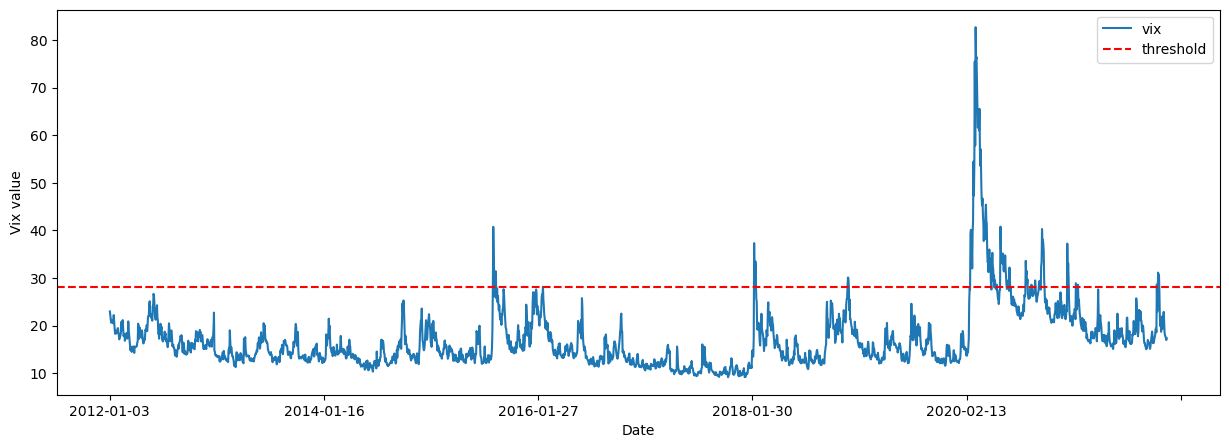

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
fig = insample_risk_indicator.set_index('date').vix.plot()
fig.axhline(y=insample_risk_indicator.vix.quantile(0.9), color='r', linestyle='--',label='threshold')
fig.set_xlabel('Date')
fig.set_ylabel('Vix value')
fig.legend()
fig.get_figure().savefig('results/train_vix.png')

print(insample_risk_indicator.vix.describe())
insample_risk_indicator.vix.describe().to_csv('results/train_vix_describe.csv')

count    249.000000
mean      38.953529
std       35.629307
min        0.108666
25%       18.433969
50%       27.840461
75%       43.988822
max      274.978571
Name: turbulence, dtype: float64


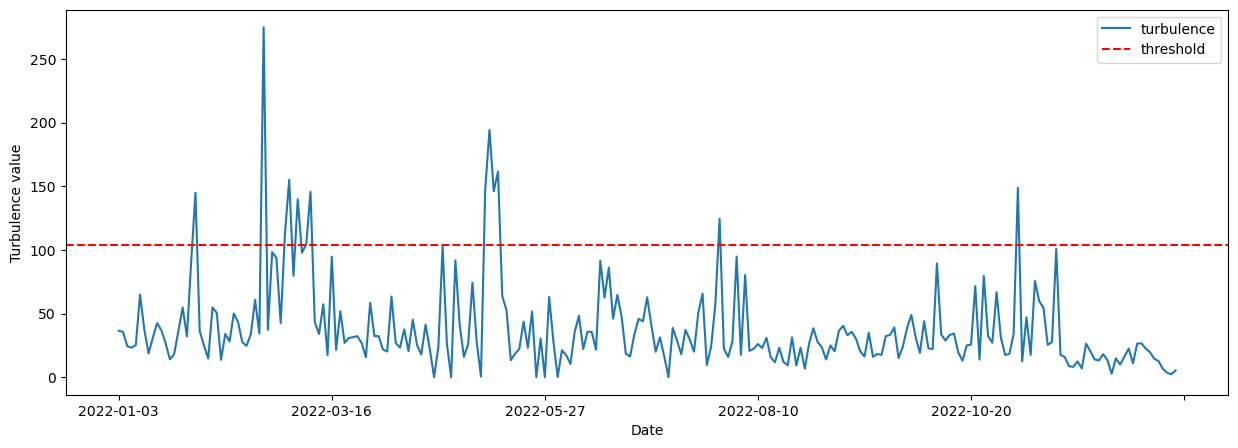

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
insample_risk_indicator.turbulence.describe()
fig = insample_risk_indicator.set_index('date').turbulence.plot()
fig.axhline(y=insample_risk_indicator.turbulence.quantile(0.9), color='r', linestyle='--',label='threshold')
fig.set_xlabel('Date')
fig.set_ylabel('Turbulence value')
fig.legend()
fig.get_figure().savefig('results/train_turbulence')

print(insample_risk_indicator.turbulence.describe())
insample_risk_indicator.turbulence.describe().to_csv('results/train_turbulence_describe.csv')

In [ ]:
insample_risk_indicator = processed_full[(processed_full.date<TRADE_END_DATE) & (processed_full.date>=TRADE_START_DATE)].drop_duplicates(subset=['date'])

count    249.000000
mean      25.653655
std        4.219056
min       16.600000
25%       22.290001
50%       25.540001
75%       28.950001
max       36.450001
Name: vix, dtype: float64


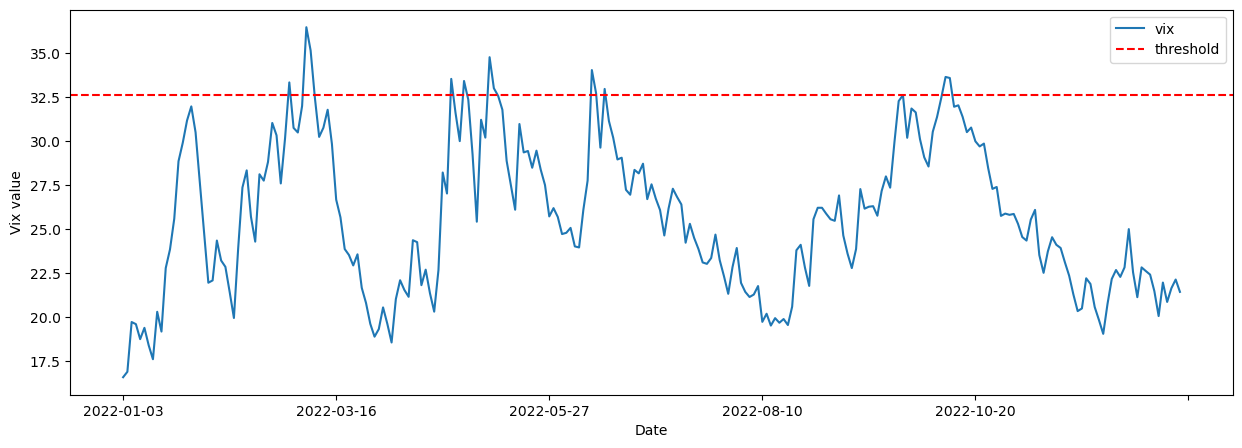

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
fig = insample_risk_indicator.set_index('date').vix.plot()
fig.axhline(y=insample_risk_indicator.vix.quantile(0.9), color='r', linestyle='--',label='threshold')
fig.set_xlabel('Date')
fig.set_ylabel('Vix value')
fig.legend()
fig.get_figure().savefig('results/trade_vix.png')

print(insample_risk_indicator.vix.describe())
insample_risk_indicator.vix.describe().to_csv('results/trade_vix_describe.csv')

count    249.000000
mean      38.953529
std       35.629307
min        0.108666
25%       18.433969
50%       27.840461
75%       43.988822
max      274.978571
Name: turbulence, dtype: float64


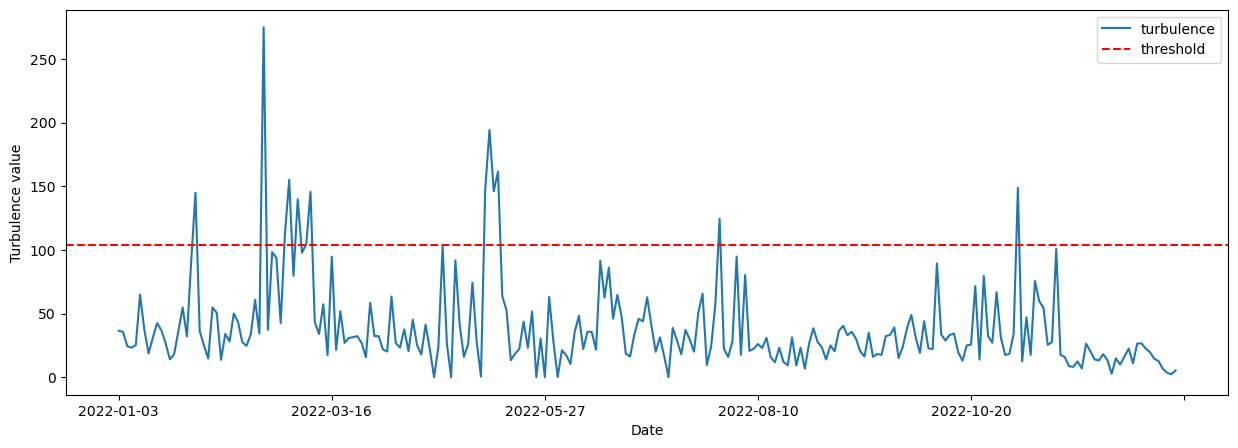

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
insample_risk_indicator.turbulence.describe()
fig = insample_risk_indicator.set_index('date').turbulence.plot()
fig.axhline(y=insample_risk_indicator.turbulence.quantile(0.9), color='r', linestyle='--',label='threshold')
fig.set_xlabel('Date')
fig.set_ylabel('Turbulence value')
fig.legend()
fig.get_figure().savefig('results/trade_turbulence')

print(insample_risk_indicator.turbulence.describe())
insample_risk_indicator.turbulence.describe().to_csv('results/trade_turbulence_describe.csv')

In [ ]:
model_list = {'a2c':trained_a2c,'ddpg':trained_ddpg,'ppo':trained_ppo,'sac':trained_sac,'td3':trained_td3}
model_name_list = ['a2c','ddpg','ppo','sac','td3']
for i, model_name in enumerate(model_name_list):
    for j, vix_quantile in enumerate([0.3,0.5,0.7,0.9]):
        e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = insample_risk_indicator.vix.quantile(vix_quantile),risk_indicator_col='vix', **env_kwargs)
        trained_model = model_list[model_name]
        df_account_value, df_actions = DRLAgent.DRL_prediction(model=trained_model, environment = e_trade_gym)
        df_account_value.set_index(df_account_value.columns[0]).to_csv('results/{}/df_account_value_vix{}'.format(model_name,int(vix_quantile*100)))
        df_actions.to_csv('results/{}/df_actions_vix{}'.format(model_name,int(vix_quantile*100)))
    for j, turbulence_quantile in enumerate([0.3,0.5,0.7,0.9]):
        e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = insample_risk_indicator.turbulence.quantile(turbulence_quantile),risk_indicator_col='vix', **env_kwargs)
        trained_model = model_list[model_name]
        df_account_value, df_actions = DRLAgent.DRL_prediction(model=trained_model, environment = e_trade_gym)
        df_account_value.set_index(df_account_value.columns[0]).to_csv('results/{}/df_account_value_turbulence{}'.format(model_name,int(turbulence_quantile*100)))
        df_actions.to_csv('results/{}/df_actions_turbulence{}'.format(model_name,int(turbulence_quantile*100)))

In [ ]:
# BASELINES = '^SSE'
print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(ticker=BASELINES, start = TRADE_START_DATE, end = TRADE_END_DATE)
stats = backtest_stats(df_dji_, value_col_name = 'close')
df_dji = pd.DataFrame()
df_dji['date'] = pd.read_csv('results/a2c/df_account_value_turbulence80')['date']
df_dji['account_value'] = df_dji_['close'] / df_dji_['close'][0] * env_kwargs["initial_amount"]
df_dji = df_dji.set_index(df_dji.columns[0])
df_dji.to_csv("results/df_{}.csv".format(DATA_NAME))

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (257, 8)


d:\Anaconda\envs\fin\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


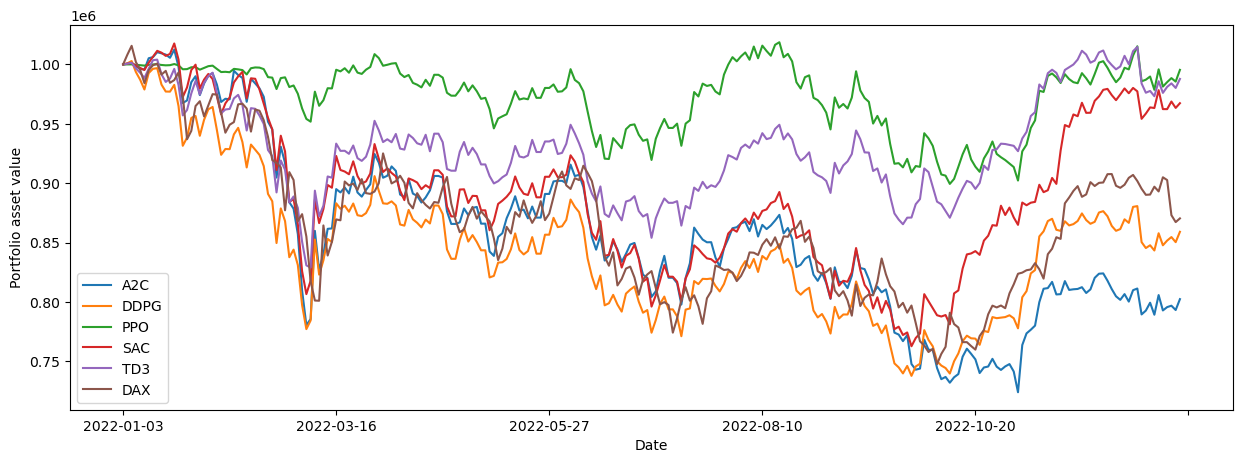

In [ ]:
%matplotlib inline
df1 = pd.read_csv('results/a2c/df_account_value_turbulence90',index_col=0)
df2 = pd.read_csv('results/ddpg/df_account_value_turbulence90',index_col=0)
df3 = pd.read_csv('results/ppo/df_account_value_turbulence90',index_col=0)
df4 = pd.read_csv('results/sac/df_account_value_turbulence90',index_col=0)
df5 = pd.read_csv('results/td3/df_account_value_turbulence90',index_col=0)
df6 = pd.read_csv('results/df_{}.csv'.format(DATA_NAME),index_col=0)

plt.rcParams["figure.figsize"] = (15,5)
df = pd.concat([df1,df2,df3,df4,df5,df6],axis=1)
df.columns=['A2C','DDPG','PPO','SAC','TD3', DATA_NAME]
fig = df.plot()
fig.set_xlabel('Date')
fig.set_ylabel('Portfolio asset value')
plt.legend()
fig.get_figure().savefig('results/backtest.png')

In [ ]:
import shutil
folder_name = 'results'
zip_file_name = 'results'
shutil.make_archive(zip_file_name, 'zip', folder_name)

'c:\\Users\\ThinkPad\\Desktop\\code\\FinRL\\results.zip'

In [ ]:
import pandas as pd
df_account_value = pd.read_csv('results_DJIA/a2c/df_account_value_turbulence80')
pd.DataFrame(backtest_stats(account_value=df_account_value))

# pd.DataFrame(backtest_stats(account_value=df_account_value_a2c)).to_csv('results/a2c_perf.csv')
# pd.DataFrame(backtest_stats(account_value=df_account_value_ddpg)).to_csv('results/ddpg_perf.csv')
# pd.DataFrame(backtest_stats(account_value=df_account_value_td3)).to_csv('results/td3_perf.csv')
# pd.DataFrame(backtest_stats(account_value=df_account_value_ppo)).to_csv('results/ppo_perf.csv')
# pd.DataFrame(backtest_stats(account_value=df_account_value_sac)).to_csv('results/sac_perf.csv')

d:\Anaconda\envs\fin\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


,0
Annual return,-0.070815
Cumulative returns,-0.070273
Annual volatility,0.202847
Sharpe ratio,-0.262300
Calmar ratio,-0.375246
Stability,0.295876
Max drawdown,-0.188716
Omega ratio,0.957078
Sortino ratio,-0.363283
Skew,NaN
